<a href="https://colab.research.google.com/github/harshp777/Virtual-Internships/blob/main/XTERN/Xtern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
! pip install osmnx


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 95 kB 4.6 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 1.0 MB 50.1 MB/s 
     |████████████████████████████████| 11.2 MB 48.5 MB/s 
     |████████████████████████████████| 960 kB 46.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [1]:
place_name = 'Indianapolis'

In [2]:
#Getting the latitude and longitude of the Indianapolis 
import osmnx as ox
import geopandas as gpd

# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)
area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((-86.32812 39.86612, -86.32812 39.865...",39.927525,39.632163,-85.93804,-86.328121,298337112,relation,1812962,39.768333,-86.15835,"Indianapolis, Marion County, Indiana, United S...",boundary,administrative,0.750027


# GATHERING THE DATA

#### To determine the radius in which the stores and places, the following website was referred 
https://www.statsamerica.org/radius/big.aspx

-> The most optimum radius determined was around 75 miles i.e around 1,20,000 metres

In [3]:
!pip install OSMPythonTools


In [4]:
import overpy           # to import the overpy module
import pandas as pd     # to import pandas library
import json 						# to import json
import requests					# to import requests



#this function gets the input from user.  INPUT = {laitutde, longitude, search_radius, option to specify the data domain like hospital,education etc.}
def get_input():
	print("\nEnter latitude (example->'28.584569') >> ")
	latitude = input()
	print("\nEnter longitude (example->'77.215868') >> ")
	longitude = input()
	print("\nEnter scan radius for target.(in meters) (EXAMPLE->'20000') >> ")
	search_radius = input()
	print("\nEnter an option.(integer) :\n1. Cafe Data\n2. places Data\n")
	option = int(input("\n>>>"))
	while option not in [1,2]: 
		print("Invalid Option. Try Again \n>>")
		option = int(input())
	return([latitude,longitude,search_radius,option])   #returns the list of user inputs



def get_eatery_query(user_input):

  prefix = """[out:json][timeout:50];("""  				          	#this is string of syntex in 'Overpass QL' language
  cafenode="""node["amenity"="cafe"](around:""" 		  	  #this is string of syntex in 'Overpass QL' language
  fastfoodnode="""node["amenity"="fast_food"](around:"""		  	  #this is string of syntex in 'Overpass QL' language
  foodcourtnode = """node["amenity"="food_court"](around:""" #this is string of syntex in 'Overpass QL' language
  icecreamnode="""node["amenity"="ice_cream"](around:""" 		  	  #this is string of syntex in 'Overpass QL' language
  pubnode="""node["amenity"="pub"](around:"""		  	  #this is string of syntex in 'Overpass QL' language
  restaurantnode = """node["amenity"="restaurant"](around:""" #this is string of syntex in 'Overpass QL' language
  suffix = """);out body;>;out skel qt;"""				        	  #this is string of syntex in 'Overpass QL' language
  q = user_input[2]+','+user_input[0]+','+user_input[1]    	  #(radius,latitude,longitude) in a string form the user input
  built_query = prefix + cafenode+ q +');'+ fastfoodnode+ q +');' + foodcourtnode+ q+');'+ icecreamnode+ q+');'+ pubnode+ q+');'+  restaurantnode+ q+');'+ suffix  #combine all the above strings in correct order to form a query
  return built_query										              #return the complete query to main function


def get_places_query(user_input):

	prefix = """[out:json][timeout:50];("""  				          	#this is string of syntex in 'Overpass QL' language
	artsnode="""node["amenity"="arts_centre"](around:""" 		  	  #this is string of syntex in 'Overpass QL' language
	cinemanode="""node["amenity"="cinema"](around:"""		  	  #this is string of syntex in 'Overpass QL' language
	communitynode = """node["amenity"="community_centre"](around:""" #this is string of syntex in 'Overpass QL' language
	nightclubnode="""node["amenity"="nightclub"](around:""" 		  	  #this is string of syntex in 'Overpass QL' language
	theatrenode="""node["amenity"="theatre"](around:"""		  	  #this is string of syntex in 'Overpass QL' language
	socialnode = """node["amenity"="social_centre"](around:""" #this is string of syntex in 'Overpass QL' language
	suffix = """);out body;>;out skel qt;"""				        	  #this is string of syntex in 'Overpass QL' language
	q = user_input[2]+','+user_input[0]+','+user_input[1]    	  #(radius,latitude,longitude) in a string form the user input
	built_query = prefix + artsnode+ q +');'+ cinemanode+ q +');' + communitynode+ q+');' + nightclubnode+ q +');'+ theatrenode+ q +');' + socialnode+ q+');'+ suffix  #combine all the above strings in correct order to form a query
	return built_query	


# this funciton uses the overpy.Overpass API to send a query and get the response from overpass servers in json format and then it extract the nodes(hospitals , schools) data to a csv file.
def extract_nodes_data_from_OSM(built_query):
	api = overpy.Overpass()                       # creating a overpass API instance 
	result = api.query(built_query)               # get result from API by sending the query to overpass servers
	list_of_node_tags = []                        # initializing empty list , we'll use it to form a dataframe .
	for node in result.nodes:                     # from each node , get the all tags information
		node.tags['latitude'] =  node.lat
		node.tags['longitude'] = node.lon
		node.tags['id'] = node.id
		list_of_node_tags.append(node.tags)
	data_frame = pd.DataFrame(list_of_node_tags)  # forming a pandas dataframe using list of dictionaries
	data_frame.to_csv('output_data.csv')
	print("\nCSV file created- 'output_data.csv'. Check the file in current directory.")
	return data_frame                             # return data frame if you want to use it further in main function.



# this function only extracts the raw  json data from overpass api through get request
def extract_raw_data_from_OSM(built_query):
	overpass_url = "http://overpass-api.de/api/interpreter" 					 #url of overpass api
	response = requests.get(overpass_url,params={'data': built_query}) # sending a get request and passing the overpass query as data parameter in url
	print(response.text)
	json_data = response.json()
	with open("output_data.json", "w") as outfile:  									 # writing the json output to a file
		json.dump(json_data, outfile)
	print("Raw Data extraction successfull!  check 'output_data.json' file.")
	return json_data
 
	
	


if __name__ == '__main__':  #main function to act accordingly to the user's input.

	user_input=get_input()
	option = user_input[3]
	if(option==1):
		query = get_eatery_query(user_input)
		data_frame = extract_nodes_data_from_OSM(query)
	elif(option==2):
		query = get_places_query(user_input)
		data_frame = extract_nodes_data_from_OSM(query)
	print("Note: \n1. Please rename the output file, so that it can't be overwritten when you execute this program again.\n2. output file shouldn't remain open while running this program, because writing will perform on the output file while executing the program next time. ")



        








Enter latitude (example->'28.584569') >> 
39.768333

Enter longitude (example->'77.215868') >> 
-86.15835

Enter scan radius for target.(in meters) (EXAMPLE->'20000') >> 
120000

Enter an option.(integer) :
1. Cafe Data
2. places Data


>>>1

CSV file created- 'output_data.csv'. Check the file in current directory.
Note: 
1. Please rename the output file, so that it can't be overwritten when you execute this program again.
2. output file shouldn't remain open while running this program, because writing will perform on the output file while executing the program next time. 


# DATA PREPROCESSING


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_places = pd.read_csv("/content/drive/MyDrive/XTERN/places_OSM.csv")
df_places.head()

,Unnamed: 0,amenity,ele,gnis:county_id,gnis:created,gnis:feature_id,gnis:state_id,name,operator,latitude,...,opening_hours,screen,air_conditioning,lgbtq,smoking,fraternity,fraternity:abbreviation,theatre:type,social_centre,level
0,0,community_centre,208.0,79.0,10/01/1982,447488.0,18.0,Vernon Gym (Vernon Elementary School),Town of Vernon,38.983388,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,social_centre,290.0,NaN,NaN,452376.0,NaN,Odd Fellows Home,NaN,39.339772,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,arts_centre,229.0,NaN,NaN,2106229.0,NaN,Christel DeHaan Fine Arts Center,NaN,39.708734,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,arts_centre,221.0,NaN,NaN,2108868.0,NaN,Cornelius Art Center,NaN,39.796111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,theatre,230.0,NaN,NaN,2106226.0,NaN,Ransburg Auditorium,NaN,39.708889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_places.columns
#df_places.shape

Index(['Unnamed: 0', 'amenity', 'ele', 'gnis:county_id', 'gnis:created',
       'gnis:feature_id', 'gnis:state_id', 'name', 'operator', 'latitude',
       'longitude', 'id', 'addr:state', 'brand', 'brand:wikidata',
       'brand:wikipedia', 'building', 'gnis:county_name', 'gnis:import_uuid',
       'gnis:reviewed', 'official_name', 'short_name', 'source', 'tourism',
       'wikidata', 'wikipedia', 'addr:city', 'addr:housenumber',
       'addr:postcode', 'addr:street', 'phone', 'website', 'alt_name',
       'theatre:genre', 'note', 'toilets:wheelchair', 'wheelchair', 'name:en',
       'description', 'inscription', 'email', 'social_centre:for', 'min_age',
       'opening_hours', 'screen', 'air_conditioning', 'lgbtq', 'smoking',
       'fraternity', 'fraternity:abbreviation', 'theatre:type',
       'social_centre', 'level'],
      dtype='object')

In [8]:
df_eatery =pd.read_csv("/content/drive/MyDrive/XTERN/eatery_OSM.csv")

In [9]:
df_eatery.columns

Index(['Unnamed: 0', 'amenity', 'created_by', 'name', 'latitude', 'longitude',
       'id', 'cuisine', 'wheelchair', 'opening_hours',
       ...
       'drink:water:hot', 'happy_hours', 'lunch:buffet', 'lunch:saladbar',
       'check_date', 'diet:chicken', 'diet:meat', 'contact:twitter',
       'payment:discover', 'year'],
      dtype='object', length=148)

In [10]:
list_places = df_places.columns.tolist()
list_eatery = df_eatery.columns.tolist()


list_places_as_set = set(list_places)
intersection = list_places_as_set.intersection(list_eatery)
#Find common elements of set and list

intersection_as_list = list(intersection)

print(intersection_as_list)


['min_age', 'description', 'amenity', 'brand:wikidata', 'Unnamed: 0', 'name:en', 'source', 'building', 'phone', 'id', 'website', 'addr:city', 'toilets:wheelchair', 'lgbtq', 'wikidata', 'addr:street', 'addr:postcode', 'alt_name', 'longitude', 'level', 'short_name', 'addr:state', 'wikipedia', 'addr:housenumber', 'official_name', 'email', 'wheelchair', 'brand', 'operator', 'name', 'smoking', 'note', 'brand:wikipedia', 'opening_hours', 'air_conditioning', 'latitude']


In [11]:
print(intersection_as_list)
#print(intersection_as_list.sort())
filt_places = df_places[intersection_as_list]

['min_age', 'description', 'amenity', 'brand:wikidata', 'Unnamed: 0', 'name:en', 'source', 'building', 'phone', 'id', 'website', 'addr:city', 'toilets:wheelchair', 'lgbtq', 'wikidata', 'addr:street', 'addr:postcode', 'alt_name', 'longitude', 'level', 'short_name', 'addr:state', 'wikipedia', 'addr:housenumber', 'official_name', 'email', 'wheelchair', 'brand', 'operator', 'name', 'smoking', 'note', 'brand:wikipedia', 'opening_hours', 'air_conditioning', 'latitude']


In [12]:
#Most of them have null values, the amenity, name features has the least null values
filt_places[intersection_as_list].isna().sum()

 

min_age               103
description           100
amenity                 0
brand:wikidata         97
Unnamed: 0              0
name:en               104
source                 98
building              104
phone                  96
id                      0
website                94
addr:city              74
toilets:wheelchair    104
lgbtq                 104
wikidata               89
addr:street            71
addr:postcode          73
alt_name              103
longitude               0
level                 104
short_name            102
addr:state             72
wikipedia             103
addr:housenumber       74
official_name         103
email                 104
wheelchair            103
brand                  97
operator               97
name                    4
smoking               104
note                  104
brand:wikipedia        97
opening_hours         103
air_conditioning      104
latitude                0
dtype: int64

## Let's explore the data for places 

In [13]:
filt_places = filt_places[['amenity', 'name', 'addr:housenumber','addr:street','addr:postcode','addr:city','addr:state','website']]

In [14]:
#filt_places['website'].where(filt_places['website'].isna() == True, 'Not provided')
filt_places['website'] = filt_places['website'].fillna('Not Provided')
filt_places['addr:state'] = filt_places['addr:state'].fillna('IN')
filt_places['addr:city'] = filt_places['addr:city'].fillna('Indianapolis')
filt_places[['addr:housenumber'	,'addr:street','addr:postcode']]= filt_places[['addr:housenumber'	,'addr:street','addr:postcode']].fillna('')


In [15]:
#Let's fetch the overall address using the addr:housenumber,addr:street,addr:postcode,addr:city,addr:state	
filt_places['address']  = filt_places['addr:housenumber']	+ ' ' + filt_places['addr:street'] + ' '+ filt_places['addr:city'] + ', ' + filt_places['addr:state']	
#Dropping irrelevant rows 
filt_places.drop(columns=['addr:housenumber' ,	'addr:street',	'addr:postcode',	'addr:city','addr:state'], axis=1, inplace=True)
#Renaming the columns
filt_places.rename(columns={'amenity': 'Type', 'name': 'Name', 'website': 'Website', 'address': 'Address'}, inplace=True)



In [16]:
filt_places.head(2)

,Type,Name,Website,Address
0,community_centre,Vernon Gym (Vernon Elementary School),Not Provided,"Indianapolis, IN"
1,social_centre,Odd Fellows Home,Not Provided,"Indianapolis, IN"


### The OpenStreetMap Api doesn't provide address information for most of the places, one way to get the exact location is to use the latitude and longitude values, and use these values in the Geopy library to get the approroate address.  

In [17]:
#Lets drop the previous 'Address' feature
filt_places.drop(columns=['Address'], inplace = True, axis= 1)

In [18]:
!pip install geopy


In [19]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")
add_list=[]
for i in range(0,filt_places.shape[0]):

  value = geolocator.reverse(df_places['latitude'].astype(str)[i] +"," + df_places['longitude'].astype(str)[i])
  # The address wil be stored in a list :add_list
  add_list.append(value.address.partition(",")[-1])

# Merging the list into the dataFrame 
filt_places['Address']= pd.DataFrame(add_list) 

## Let's explore the data for Eatery 

In [20]:
filt_eatery= df_eatery[intersection_as_list]

In [21]:
filt_eatery.head(2)

,min_age,description,amenity,brand:wikidata,Unnamed: 0,name:en,source,building,phone,id,...,wheelchair,brand,operator,name,smoking,note,brand:wikipedia,opening_hours,air_conditioning,latitude
0,NaN,NaN,pub,NaN,0,NaN,NaN,NaN,NaN,297400287,...,NaN,NaN,NaN,The Willard,NaN,NaN,NaN,NaN,NaN,39.481385
1,NaN,NaN,fast_food,NaN,1,NaN,NaN,NaN,NaN,471267405,...,NaN,NaN,NaN,Indianapolis 500 Grill,NaN,NaN,NaN,NaN,NaN,39.715038


In [22]:
df_eatery.columns

Index(['Unnamed: 0', 'amenity', 'created_by', 'name', 'latitude', 'longitude',
       'id', 'cuisine', 'wheelchair', 'opening_hours',
       ...
       'drink:water:hot', 'happy_hours', 'lunch:buffet', 'lunch:saladbar',
       'check_date', 'diet:chicken', 'diet:meat', 'contact:twitter',
       'payment:discover', 'year'],
      dtype='object', length=148)

In [23]:
filt_eatery[intersection_as_list].isna().sum()

min_age               1696
description           1684
amenity                  0
brand:wikidata         972
Unnamed: 0               0
name:en               1691
source                1687
building              1697
phone                 1423
id                       0
website               1438
addr:city             1062
toilets:wheelchair    1684
lgbtq                 1697
wikidata              1697
addr:street            930
addr:postcode         1016
alt_name              1667
longitude                0
level                 1665
short_name            1671
addr:state            1092
wikipedia             1697
addr:housenumber       952
official_name         1536
email                 1686
wheelchair            1560
brand                  970
operator              1694
name                    42
smoking               1621
note                  1695
brand:wikipedia       1006
opening_hours         1473
air_conditioning      1679
latitude                 0
dtype: int64

In [32]:
filt_eatery = df_eatery[['amenity', 'name', 'addr:housenumber','addr:street','addr:postcode','addr:city','addr:state','website','latitude','longitude']]

In [33]:
filt_eatery.head(2)

,amenity,name,addr:housenumber,addr:street,addr:postcode,addr:city,addr:state,website,latitude,longitude
0,pub,The Willard,NaN,NaN,NaN,NaN,NaN,NaN,39.481385,-86.054844
1,fast_food,Indianapolis 500 Grill,NaN,NaN,NaN,NaN,NaN,NaN,39.715038,-86.297792


In [34]:
# Still same issue persists, the address could not be retrieved from the API so directly using Geopy having the latitude and longitude 
filt_eatery['website'] = filt_eatery['website'].fillna('Not Provided')
filt_eatery.drop(columns=['addr:housenumber'	,'addr:street','addr:postcode','addr:city'	,'addr:state'], axis=1, inplace= True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
filt_eatery.head(2)

,amenity,name,website,latitude,longitude
0,pub,The Willard,Not Provided,39.481385,-86.054844
1,fast_food,Indianapolis 500 Grill,Not Provided,39.715038,-86.297792


In [36]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")
add_list=[]
for i in range(0,filt_eatery.shape[0]):

  value = geolocator.reverse(filt_eatery['latitude'].astype(str)[i] +"," + filt_eatery['longitude'].astype(str)[i])
  # The address wil be stored in a list :add_list
  add_list.append(value.address.partition(",")[-1])

# Merging the list into the dataFrame 
filt_eatery['Address']= pd.DataFrame(add_list) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [38]:
filt_eatery.head(2)

,amenity,name,website,latitude,longitude,Address
0,pub,The Willard,Not Provided,39.481385,-86.054844,"East Madison Street, Franklin, Johnson County..."
1,fast_food,Indianapolis 500 Grill,Not Provided,39.715038,-86.297792,"7800, Colonel H. Weir Cook Memorial Drive, In..."


In [39]:
filt_eatery.drop(columns=['latitude','longitude'],axis=1, inplace=True)

filt_eatery.rename(columns={'amenity': 'Type', 'name': 'Name', 'website': 'Website', 'address': 'Address'}, inplace=True)
filt_eatery['Name']=filt_eatery['Name'].fillna('Not Provided')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [44]:
filt_places.to_csv(r'/content/drive/MyDrive/XTERN/places.csv', index = False)
filt_eatery.to_csv(r'/content/drive/MyDrive/XTERN/eateries.csv', index = False)


### Dataset has been genrated, we will utilize the generated dataset for the analysis.

In [54]:
! pip install overpy
!pip install geopy
!pip install geopandas
!pip install folium matplotlib mapclassify


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
# merging two csv files
df = pd.concat(
    map(pd.read_csv, ['/content/drive/MyDrive/XTERN/eateries.csv', '/content/drive/MyDrive/XTERN/places.csv']), ignore_index=True)

In [46]:
df.to_csv(r'/content/drive/MyDrive/XTERN/places_eateries.csv', index = False)
df.head(5)

,Type,Name,Website,Address
0,pub,The Willard,Not Provided,"East Madison Street, Franklin, Johnson County..."
1,fast_food,Indianapolis 500 Grill,Not Provided,"7800, Colonel H. Weir Cook Memorial Drive, In..."
2,restaurant,The Trojan Horse,Not Provided,"East Kirkwood Avenue, Bloomington, Monroe Cou..."
3,cafe,Uptown Cafe,Not Provided,"East Kirkwood Avenue, Bloomington, Monroe Cou..."
4,restaurant,Grazie! Italiano,Not Provided,"West 6th Street, Bloomington, Monroe County, ..."


### Let's explore places first

In [57]:
# For the purpose of analysis, let's include the data containing 'latitude' and 'longitude' features as well

places = pd.read_csv('/content/drive/MyDrive/XTERN/places.csv')
places[['latitude','longitude']]= df_places[['latitude','longitude']] 

In [58]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [59]:
geometry = [Point (xy) for xy in zip(places['longitude'], places['latitude'])]
geometry[:2]

In [60]:
crs={'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(places, crs=crs, geometry = geometry) 
geo_df.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Type,Name,Website,Address,latitude,longitude,geometry
0,community_centre,Vernon Gym (Vernon Elementary School),Not Provided,"Washington Street, Vernon, Jennings County, I...",38.983388,-85.611079,POINT (-85.61108 38.98339)
1,social_centre,Odd Fellows Home,Not Provided,"East Central Avenue, Greensburg, Decatur Coun...",39.339772,-85.465525,POINT (-85.46552 39.33977)
2,arts_centre,Christel DeHaan Fine Arts Center,Not Provided,"East Hanna Avenue, University Heights, Indian...",39.708734,-86.136898,POINT (-86.13690 39.70873)
3,arts_centre,Cornelius Art Center,Not Provided,"East 21st Street, Herron-Morton Place, Herron...",39.796111,-86.144167,POINT (-86.14417 39.79611)
4,theatre,Ransburg Auditorium,Not Provided,"National Avenue, Indianapolis, Marion County,...",39.708889,-86.134722,POINT (-86.13472 39.70889)


In [61]:
street_map = gpd.read_file('/content/drive/MyDrive/XTERN/state(State)/cb_2018_18_bg_500k.shp')
#fig, ax = plt.subplots(figsize= (,15))
#street_map.plot(ax=ax)

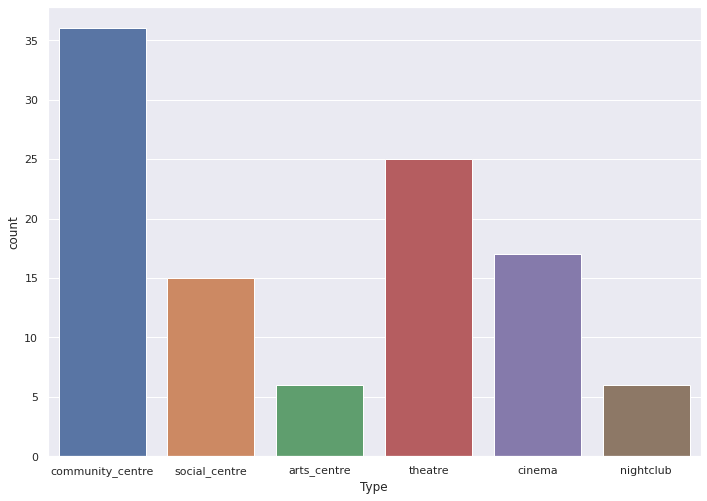

In [62]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='Type',data=places)

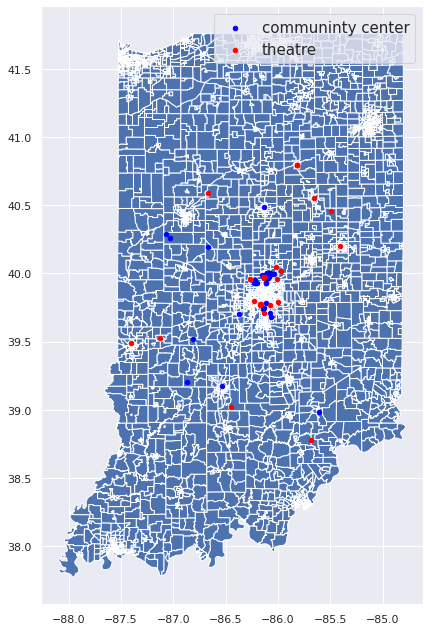

In [63]:
fig,ax = plt.subplots(figsize=(12,11))
street_map.plot(ax=ax)
geo_df[geo_df['Type'] == 'community_centre'].plot(ax=ax, markersize = 20, color= "yellow", marker='o', label='communinty center')
geo_df[geo_df['Type'] == 'theatre'].plot(ax=ax, markersize = 20, color= "red", marker='o', label='theatre')
plt.legend(prop={'size': 15})

In [64]:
#geo_df.explore(column='Type', cmap='Set2')
#fig, ax = plt.subplots(figsize= (,15))
#street_map.plot(ax=ax)
import folium
m = geo_df.explore(column="Type", name="Places",popup= True, highlight= True,scheme='NaturalBreaks',marker_kwds={'radius':5})
folium.LayerControl().add_to(m)
m

## Let's explore *Eateries*

In [65]:
# For the purpose of analysis, let's include the data containing 'latitude' and 'longitude' features as well

eatery = pd.read_csv('/content/drive/MyDrive/XTERN/eateries.csv')
eatery[['latitude','longitude']]= df_eatery[['latitude','longitude']] 

In [66]:
geometry = [Point (xy) for xy in zip(eatery['longitude'], eatery['latitude'])]
geometry[:2]

In [67]:
crs={'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(eatery, crs=crs, geometry = geometry) 
geo_df.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Type,Name,Website,Address,latitude,longitude,geometry
0,pub,The Willard,Not Provided,"East Madison Street, Franklin, Johnson County...",39.481385,-86.054844,POINT (-86.05484 39.48139)
1,fast_food,Indianapolis 500 Grill,Not Provided,"7800, Colonel H. Weir Cook Memorial Drive, In...",39.715038,-86.297792,POINT (-86.29779 39.71504)
2,restaurant,The Trojan Horse,Not Provided,"East Kirkwood Avenue, Bloomington, Monroe Cou...",39.166454,-86.533383,POINT (-86.53338 39.16645)
3,cafe,Uptown Cafe,Not Provided,"East Kirkwood Avenue, Bloomington, Monroe Cou...",39.166451,-86.533282,POINT (-86.53328 39.16645)
4,restaurant,Grazie! Italiano,Not Provided,"West 6th Street, Bloomington, Monroe County, ...",39.167710,-86.533934,POINT (-86.53393 39.16771)


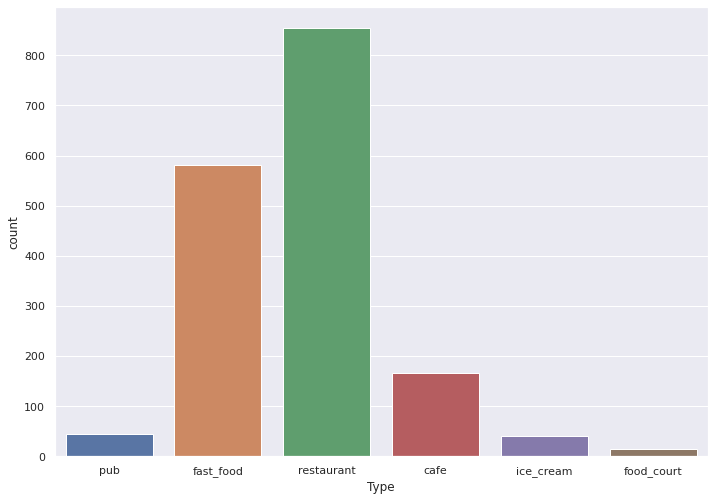

In [68]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='Type',data=eatery)

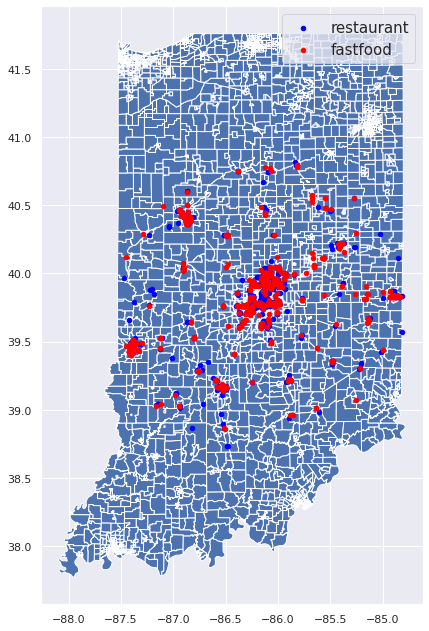

In [69]:
street_map = gpd.read_file('/content/drive/MyDrive/XTERN/state(State)/cb_2018_18_bg_500k.shp')
fig,ax = plt.subplots(figsize=(12,11))
street_map.plot(ax=ax)
geo_df[geo_df['Type'] == 'restaurant'].plot(ax=ax, markersize = 20, color= "yellow", marker='o', label='restaurant')
geo_df[geo_df['Type'] == 'fast_food'].plot(ax=ax, markersize = 20, color= "red", marker='o', label='fastfood')
plt.legend(prop={'size': 15})

In [70]:
import folium
m = geo_df.explore(column="Type", name="Places",popup= True, highlight= True,scheme='NaturalBreaks',marker_kwds={'radius':5})
folium.LayerControl().add_to(m)
m



1.   Indianapolis seems to be having most number of places to visit. It is evident because Indianapolis is regarded as the capital of Indiana and because it comprises of memorials, sport events, and provieds big-city living to the people

2.   It is observed that most of the community centres are located in and around Carmel followed by Indianapolis. It is evident that Carmel is the most visited city after Indianapolis

3.   Distance between Carmel and Indianapolis is just 16 miles, it will be worth spending 0.5 hrs travelling to explore different places.

4. Restaurant and fast food comprises highest number of possibiities to have a food in Indianapolis.
5. Indianapolis and the region around it concists of most number of community centres and theatres. 

###-----------------------Lets summarize the places which I would prefer to visit from 9 am to 9 pm in a day---------------------------



*   Will plan to vist Carmel after having a breakfast at home.
*   Initially will visit Christ commnity church at carmel, which would take around 0.5 to 1 hour.
*   Golf being my favourite sport, will proceed at the most famous Broookshire Public Golf club Clubhouse to play golf which will be around 4-5 hours.
*   I will get done with my lunch at the clubhouse itself.
*   Will travel back to Indianapolis to enjoy the rest of the day. 
*   Initally will move to cafe in order to get fresh and relax. There are plenty of good cafes in Indianapolis. I would prefer which is most near to my next destination the most popular art center 'Harrison Center for the Arts' for around 2-3 hours.
*   Will proceed to 'The Lawn at White River State park' to enjoy some bands and artists performing over there for around 2-3 hours.
*   Its dinner time!! Lets get some dinner at a restaurant.
*   Lastly, lets watch Tom cruise in action at a cinema nearby.
*   Back home 





In [94]:
# list of strings
lst2 = ['Carmel United Methodist Church','Brookshire Public Golf Club Clubhouse', "Tea's Me Cafe Indy", "Harrison Center for the Arts", 'The Lawn at White River State park', 'IMAX',"The Eagle's Nest" ]
lst1=['9:30 AM', '10:30 AM','2:30 PM','3:00 PM','5:00 PM','6:30 PM', '8:30 PM']
lst3 = ['East Walnut Street, Newark Village, Carmel, Hamilton County, Indiana, 46032, United States', ' 12120 B, Brookshire Parkway, Brookshire North, Carmel, Hamilton County, Indiana, 46033, United States', '140 E 22nd St B, Indianapolis, IN 46202', ' East 15th Street, Old Northside, Indianapolis, Marion County, Indiana, 46202, United States',  ' 650, West Washington Street, Indianapolis, Marion County, Indiana, 46222, United States','1 S Capitol Ave, Indianapolis, IN 46204']
lst4=['Tour', 'Sport','Refreshment','Tour','Entertainment','Entertainment', 'Dinner']
lst5=['0.5 hour', '3 hour','0.5 hour','1.5 hour','1.5 hour','2 hour', '0.5 hour']
# Calling DataFrame constructor after zipping
# both lists, with columns specified
final = pd.DataFrame(list(zip(lst1, lst2,lst3,lst4,lst5)),
               columns =['Time', 'Name','Address','Activity_Type','Duration'])

In [95]:
final

,Time,Name,Address,Activity_Type,Duration
0,9:30 AM,Carmel United Methodist Church,"East Walnut Street, Newark Village, Carmel, Ha...",Tour,0.5 hour
1,10:30 AM,Brookshire Public Golf Club Clubhouse,"12120 B, Brookshire Parkway, Brookshire North...",Sport,3 hour
2,2:30 PM,Tea's Me Cafe Indy,"140 E 22nd St B, Indianapolis, IN 46202",Refreshment,0.5 hour
3,3:00 PM,Harrison Center for the Arts,"East 15th Street, Old Northside, Indianapolis...",Tour,1.5 hour
4,5:00 PM,The Lawn at White River State park,"650, West Washington Street, Indianapolis, Ma...",Entertainment,1.5 hour
5,6:30 PM,IMAX,"1 S Capitol Ave, Indianapolis, IN 46204",Entertainment,2 hour


In [96]:
final.to_csv(r'/content/drive/MyDrive/XTERN/final_activities.csv', index = False)

##                        **Thankyou!!**

